<a href="https://colab.research.google.com/github/alejandro-cermeno/2021_Market_Timing-Cermeno/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Alejandro Cermeño 

06/2021

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Obtencion de datos

os.chdir('/content/drive/MyDrive/TESIS/Code') # Directorio

df = pd.read_excel('datos.xlsx', sheet_name= 'datos')

ipsa     = df.iloc[:,4:6]
mexbol   = df.iloc[:,0:2]
spblpgpt = df.iloc[:,2:4]

pais = ['Chile', 'Mexico', 'Peru']

series = [mexbol, spblpgpt, ipsa]

for i in range(len(series)):
  series[i] = series[i].dropna() # Elimina valores ausentes
  series[i] = series[i].set_index(list(series[i].columns[[0]])) # Indice

In [13]:
# Estadísticos descriptivos

def describe(df):

  '''Calcula el número de observaciones, desviación estandar, valor mínimo y
  máximo, simetría y kurtosis de las series ingresadas'''

  descrip = [] # Para almacenar resultados

  for i in range(len(series)):

    # Se especifican los estadísticos
    descrip = pd.concat([df[i].describe().loc[['count','max', 'min', 'std']].T,
                         df[i].skew().rename('skew'),
                         df[i].kurt().rename('kurt')],
                      axis=1)
    
    descrip.append(descrip) # Consolidación de resultados de series ingresadas

    print(descrip) # Salida

describe(series)

         count       max      min           std      skew      kurt
mexbol  7095.0  51713.38  1447.52  17167.445986  0.043485 -1.652756
           count       max      min          std      skew      kurt
spblpgpt  4843.0  24051.62  1109.89  6747.470028 -0.591898 -0.952316
       count      max    min         std      skew      kurt
ipsa  7687.0  5880.47  89.87  1648.48906  0.275161 -1.410011


In [174]:
# Calculo de retornos

def logret(series):

  '''Tranforma la serie de precios al logaritmo del retorno'''

  logret_series = []

  for i in range(len(series)):

    logret = (np.log(series[i]) - np.log(series[i].shift(1))).dropna()
    logret_series.append(logret)

  return logret_series

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

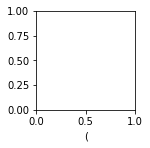

In [187]:
# Grafico de retornos

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
import seaborn as sns

letra = ['a', 'b', 'c']


for i in range(len(series)):
    plt.subplot(a, b, c)
    plt.xlabel('(')
    sns.countplot(pd.DataFrame(logret_series[i]))
    c = c + 1

plt.show()

In [46]:
# Modelo ARIMA

,fecha.2,ipsa
0,1990-08-09,92.10
1,1990-08-10,93.28
2,1990-08-13,93.51
3,1990-08-14,93.64
4,1990-08-16,94.68
...,...,...
7682,2021-06-03,4226.90
7683,2021-06-04,4225.89
7684,2021-06-07,4131.38
7685,2021-06-08,4172.34


In [47]:
spblpgpt

,fecha.1,spblpgpt
0,2002-02-07,1260.86
1,2002-02-08,1265.62
2,2002-02-11,1263.40
3,2002-02-12,1263.60
4,2002-02-13,1264.62
...,...,...
4838,2021-06-03,21382.67
4839,2021-06-04,22218.67
4840,2021-06-07,20497.95
4841,2021-06-08,20385.54
